## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Exploration

In [2]:
from sklearn.datasets import load_diabetes

# load dataset
diabetes_data = load_diabetes()

In [20]:
# print(diabetes_data.DESCR)

In [4]:
# load dataset feature variables into dataframe
patients = pd.DataFrame(data=diabetes_data['data'], columns=diabetes_data['feature_names'])
#display first few rows
patients.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
# add target column
patients['progression']=diabetes_data.target
patients.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


    - We have 442 samples, 11 features, with Progression being the target variable.
    - Also, there are no missing values in our dataset.
    - The s1 to s6 columns represent the are six blood serum measurements of each diabetes patients
    - The target column progression is the quantitative measure of disease progression one year after baseline.
    - Its also worthy to note that each of the 10 feature variables have been mean centered and scaled
    
So we go straight to EDA

## Data Visualization
---
**Relationship between features**

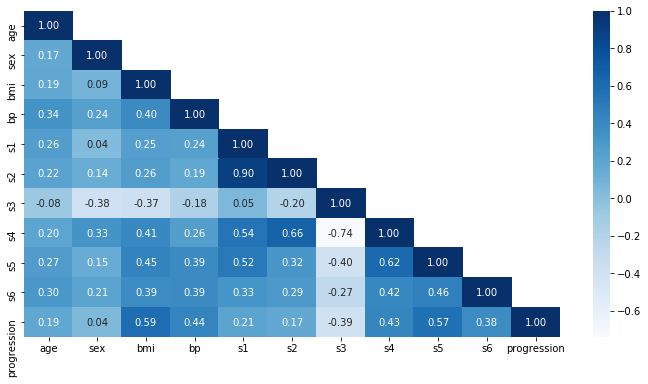

In [7]:
# plot of correlation between all variables
corr_data  = patients.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_data, annot=True, cmap='Blues', mask=np.triu(np.ones_like(patients.corr()), k=1), fmt='.2f')

In the above heatmap, brighter colors indicate more correlation. As we can see from the heatmap, only BMI and the fifth measurement both have a mild correlation with the outcome variable.
___
**check the correlation of Age, BMI, BP and progression columns**

In [8]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

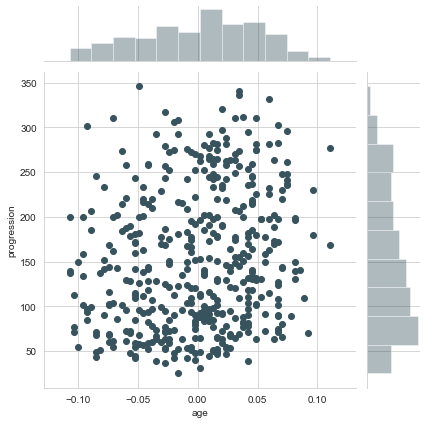

In [9]:
# progression vs age
sns.jointplot(x='age', y='progression', data=patients)
plt.show()

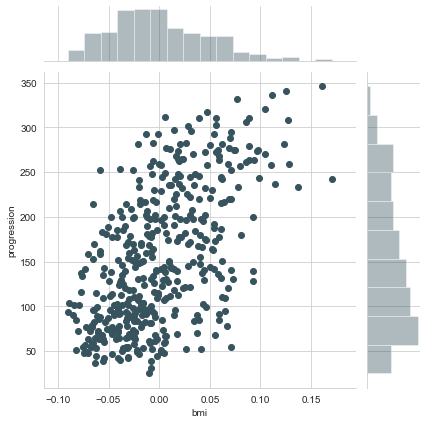

In [10]:
# progression vs bmi
sns.jointplot(x='bmi', y='progression', data=patients)
plt.show()

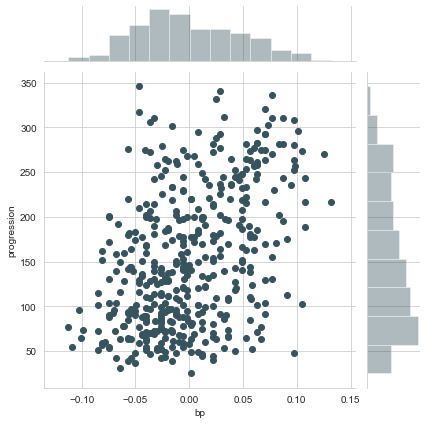

In [11]:
# progression vs bp
sns.jointplot(x='bp', y='progression', data=patients)
plt.show()

## Modelling

In [12]:
#Split the dataset into feature and target variables
X = patients.drop('progression', axis=1)
Y = patients['progression']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
predictions = lr.predict(X_test)

In [15]:
# get coefficients
print(lr.coef_)

[  10.45384922 -261.16601105  538.84541221  280.72544466 -855.21447839
  472.17305267  166.51881384  309.88763264  684.0489522   102.37723262]


In [16]:
# get y intercept
print(lr.intercept_)

152.61083063288848


Let's move on to evaluate our model!

## Evaluation

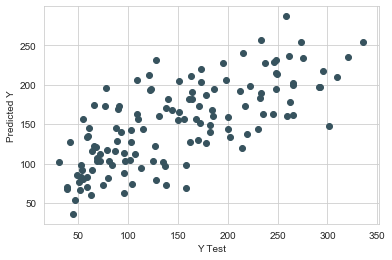

In [17]:
# plot of predictions against actual y test
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

plt.show()

In [18]:
# calculate these metrics!
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 44.48057319064366
MSE: 2926.8005772468828
RMSE: 54.099912913487046


In [22]:
print("Training_score : " , lr.score(X_train, y_train))
print("Test_score : ", lr.score(X_test, y_test))

Training_score :  0.5174979976746197
Test_score :  0.5078285584893742


## Conclusion
Though the accuracy of our model is quite poor, it perfroms almost the same on both training and test data. Further improvements can do by:
- engineering new features or combining existing ones
- tuning the hyperparameters